In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from google.colab import drive
from sklearn.metrics import mean_squared_error

In [ ]:
drive.mount ('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Linear Regression/InsuranceCharges-Datasets.csv')

In [ ]:
data.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group,charges
0,560,46,0,19.95,2,0,1,1,9193.83850
1,1285,47,0,24.32,0,0,0,1,8534.67180
2,1142,52,0,24.86,0,0,2,1,27117.99378
3,969,39,0,34.32,5,0,2,2,8596.82780
4,486,54,0,21.47,3,0,1,1,12475.35130


In [ ]:
pd.Series(data['BMI_group']).unique()

array([1, 2, 0, 3, 4])

In [ ]:
df = pd.DataFrame(data)
df.drop(df.index[df['BMI_group'] == 0], inplace = True)

In [ ]:
pd.Series(df['BMI_group']).unique()

array([1, 2, 3, 4])

In [ ]:
data = df

In [ ]:
pd.Series(data['BMI_group']).unique()

array([1, 2, 3, 4])

In [ ]:
print(data.head())

   Unnamed: 0  age  sex    bmi  ...  smoker  region  BMI_group      charges
0         560   46    0  19.95  ...       0       1          1   9193.83850
1        1285   47    0  24.32  ...       0       0          1   8534.67180
2        1142   52    0  24.86  ...       0       2          1  27117.99378
3         969   39    0  34.32  ...       0       2          2   8596.82780
4         486   54    0  21.47  ...       0       1          1  12475.35130

[5 rows x 9 columns]


In [ ]:
print(round(data['smoker'].corr(data['bmi']),4))
print(round(data['smoker'].corr(data['age']),4))
print(round(data['smoker'].corr(data['charges']),4))

-0.0033
-0.0552
0.7797


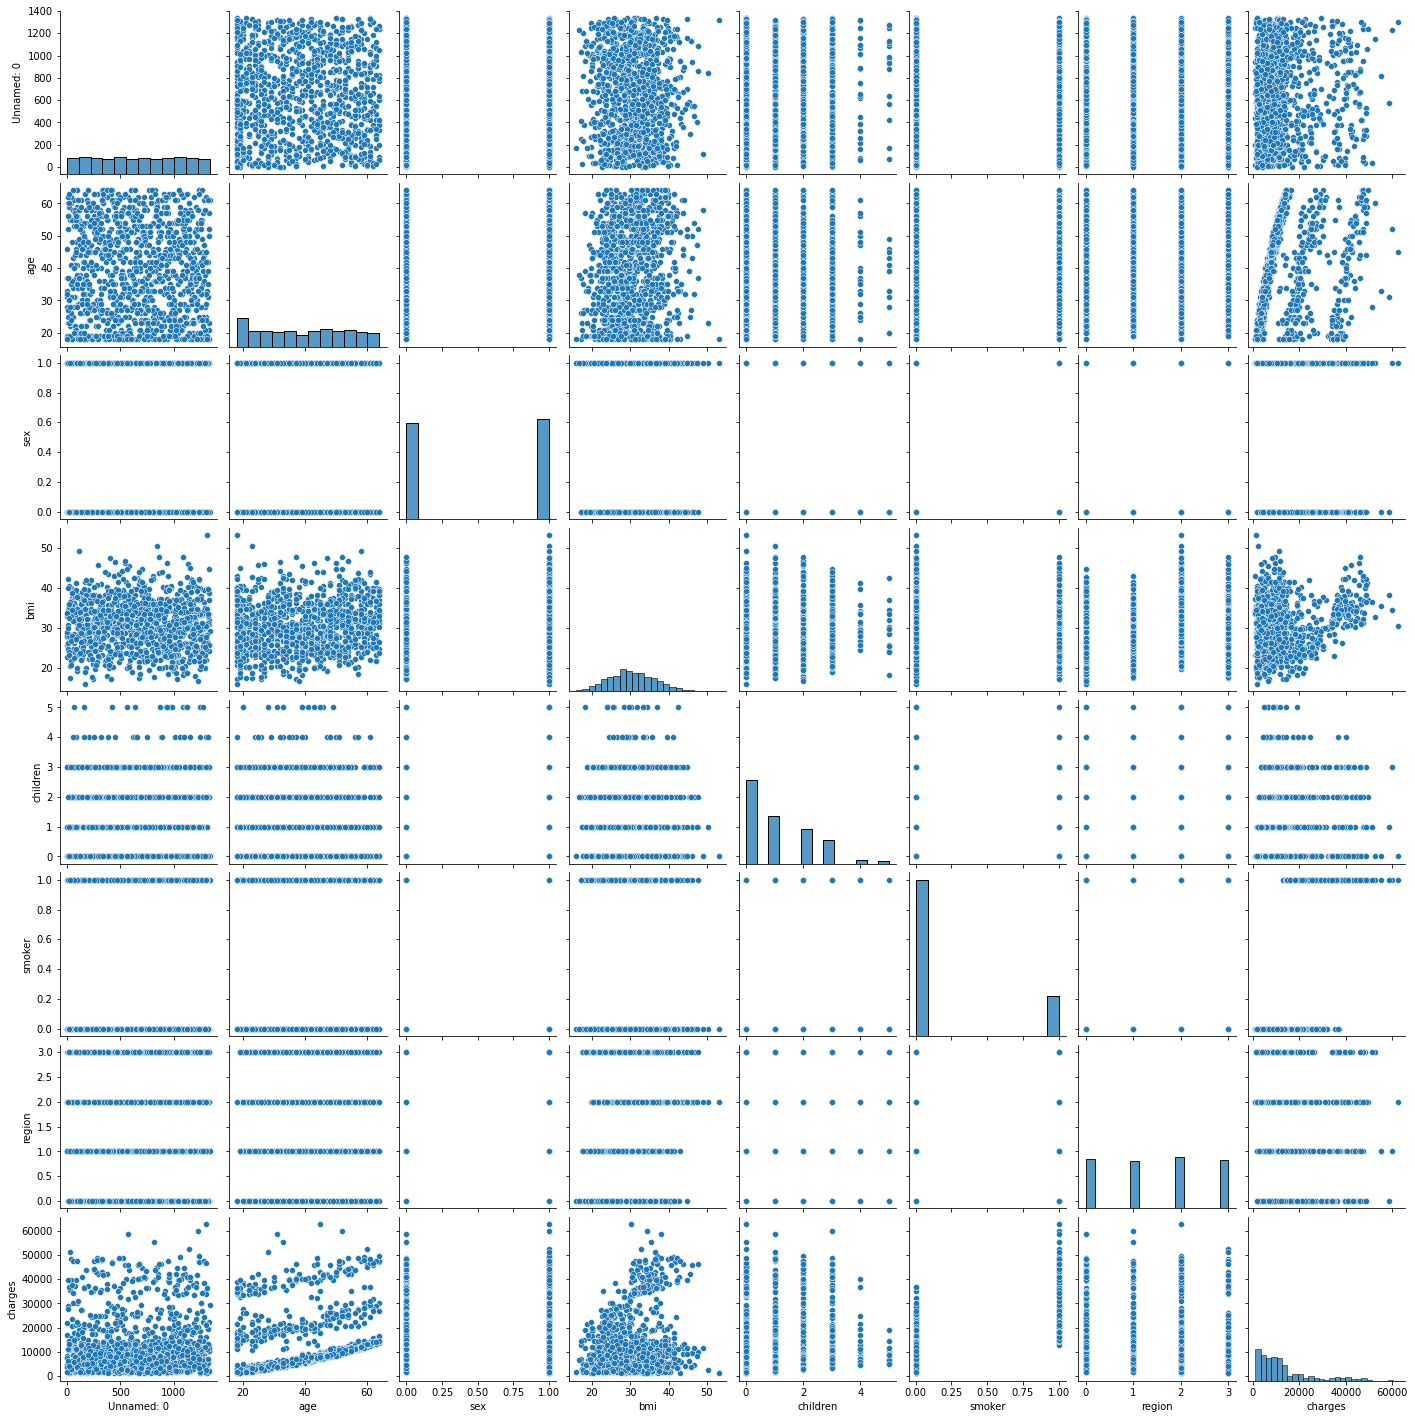

In [ ]:
sns.pairplot(train)

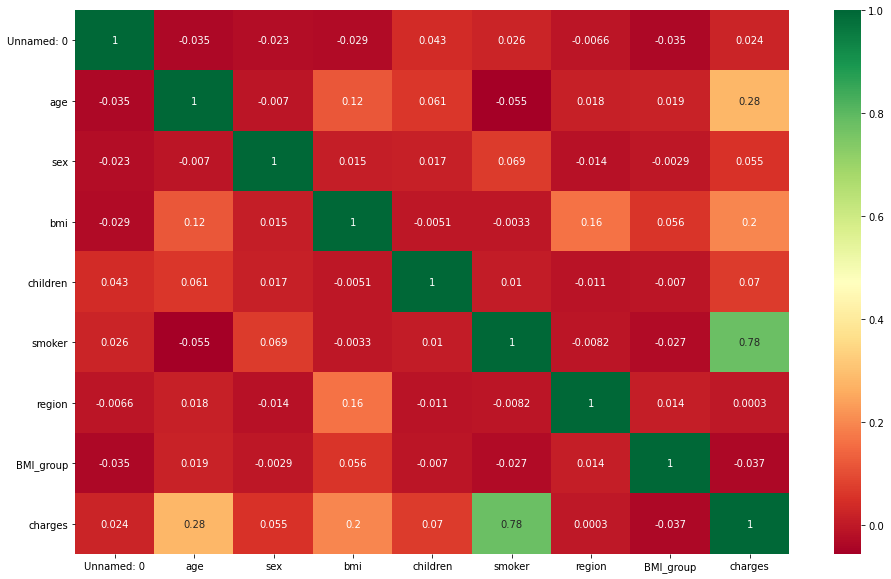

In [ ]:
plot.figure(figsize = (16,10))
sns.heatmap(data.corr(),annot= True,cmap='RdYlGn')
# plot.show()

In [ ]:
dependent_variable = 'charges'
data.isnull().values.any()

False

In [ ]:
independent_variables = data.columns.tolist()
independent_variables.remove(dependent_variable)
independent_variables.remove(independent_variables[0])
independent_variables

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'BMI_group']

In [ ]:
X = data[independent_variables] # ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'BMI_group']

y = data[dependent_variable] # charges

In [ ]:
X

,age,sex,bmi,children,smoker,region,BMI_group
0,46,0,19.950,2,0,1,1
1,47,0,24.320,0,0,0,1
2,52,0,24.860,0,0,2,1
3,39,0,34.320,5,0,2,2
4,54,0,21.470,3,0,1,1
...,...,...,...,...,...,...,...
1065,18,0,31.350,4,0,0,2
1066,39,0,23.870,5,0,2,1
1067,58,1,25.175,0,0,0,3
1068,37,0,47.600,2,1,3,2


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.1288113  0.00954465 0.09941896 0.02563346 0.60896307 0.02314612
 0.10448244]


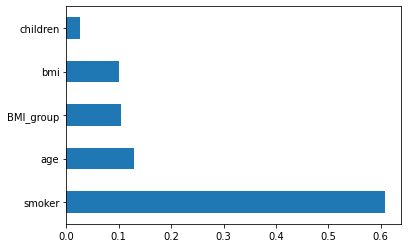

In [ ]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(850, 7)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

n_estimators= [int(X) for X in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#randomized Search CV

n_estimators= [int(X) for X in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(X) for X in np.linspace(5,30,num=6)]
min_sample_split = [2,5,10,15,100]
min_sample_leaf = [1,2,5,10]

In [ ]:
#Create random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_sample_split,
    'min_samples_leaf' : min_sample_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# use the random grid to esearch for best hyperparameters
# create the base model to tune
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
     estimator = rf, 
     param_distributions = random_grid,
     scoring='neg_mean_squared_error', 
     n_iter = 10, 
     cv = 5, 
     verbose=2, 
     random_state=42, 
     n_jobs = 1
)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 700}

In [ ]:
predictions=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


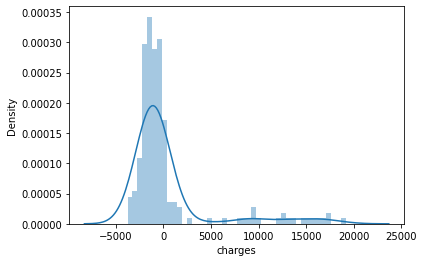

In [ ]:
sns.distplot(y_test-predictions)

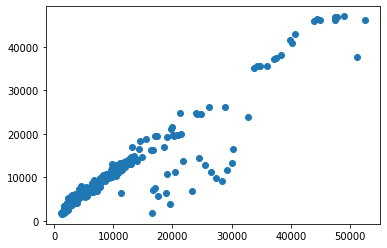

In [ ]:
plot.scatter(y_test,predictions) # positive linear regression :)

In [ ]:
import pickle
file = open('/gdrive/My Drive/Colab Notebooks/Linear Regression/random_forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)